In [2]:
!pip install -U scikit-fuzzy

import sys
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FuncFormatter
import numpy as np
import math
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from tabulate import tabulate

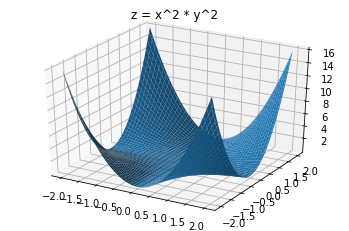

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 * Y**2
surf = ax.plot_surface(X, Y, Z,)
plt.title('z = x^2 * y^2')
plt.show()

termsLength5 = [
          'сильно малая',
          'малая',
          'средняя',
          'большая',
          'сильно большая'
]

termsLength7 = [
          'очень сильно малая',
          'сильно малая',
          'малая',
          'средняя',
          'большая',
          'сильно большая',
          'очень сильно большая'
]

termsLength9 = [
          'очень сильно малая',
          'сильно малая',
          'малая',
          'меньше среднего',
          'средняя',
          'больше среднего',
          'большая',
          'сильно большая',
          'очень сильно большая'
]

termsLength11 = [
           'очень сильно малая',
           'сильно малая',
           'малая',
           'больше малой',
           'меньше среднего',
           'средняя',
           'больше среднего',
           'меньше большой',
           'большая',
           'сильно большая',
           'очень сильно большая'
]

def getSection(start, end, numberTerms):
  terms = []
  if numberTerms == 5:
    terms = termsLength5
  elif numberTerms == 7:
    terms = termsLength7
  elif numberTerms == 9:
    terms = termsLength9
  elif numberTerms == 11:
    terms = termsLength11
  
  step = (abs(start) + abs(end)) / (numberTerms)
  
  print("{} термов:".format(numberTerms))
  for i in range(numberTerms):
    print("{} на отрезке от {:.2f} до {:.2f}".format(terms[i], start + step * i, start + step * (i+1)))

In [4]:
print("Данные для построения " + "\033[1m" +  "ФП X:" + "\033[0m")
getSection(-2, 2, 5)
getSection(-2, 2, 7)
getSection(-2, 2, 9)
getSection(-2, 2, 11)
print("")
print("Данные для построения " + "\033[1m" +  "ФП Y:" + "\033[0m")
getSection(-2, 2, 5)
getSection(-2, 2, 7)
getSection(-2, 2, 9)
getSection(-2, 2, 11)
print("")
print("Данные для построения " + "\033[1m" +  "ФП Z:" + "\033[0m")
getSection(0, 16, 5)
getSection(0, 16, 7)
getSection(0, 16, 9)
getSection(0, 16, 11)

Данные для построения ФП X:
5 термов:
сильно малая на отрезке от -2.00 до -1.20
малая на отрезке от -1.20 до -0.40
средняя на отрезке от -0.40 до 0.40
большая на отрезке от 0.40 до 1.20
сильно большая на отрезке от 1.20 до 2.00
7 термов:
очень сильно малая на отрезке от -2.00 до -1.43
сильно малая на отрезке от -1.43 до -0.86
малая на отрезке от -0.86 до -0.29
средняя на отрезке от -0.29 до 0.29
большая на отрезке от 0.29 до 0.86
сильно большая на отрезке от 0.86 до 1.43
очень сильно большая на отрезке от 1.43 до 2.00
9 термов:
очень сильно малая на отрезке от -2.00 до -1.56
сильно малая на отрезке от -1.56 до -1.11
малая на отрезке от -1.11 до -0.67
меньше среднего на отрезке от -0.67 до -0.22
средняя на отрезке от -0.22 до 0.22
больше среднего на отрезке от 0.22 до 0.67
большая на отрезке от 0.67 до 1.11
сильно большая на отрезке от 1.11 до 1.56
очень сильно большая на отрезке от 1.56 до 2.00
11 термов:
очень сильно малая на отрезке от -2.00 до -1.64
сильно малая на отрезке от -1.64 

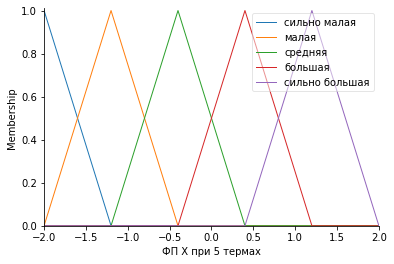

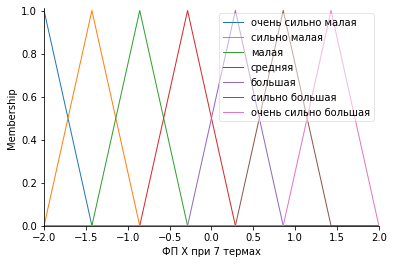

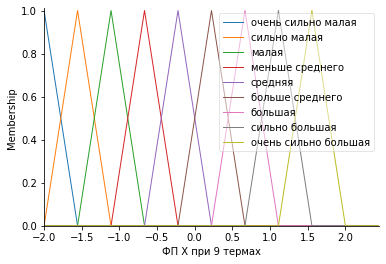

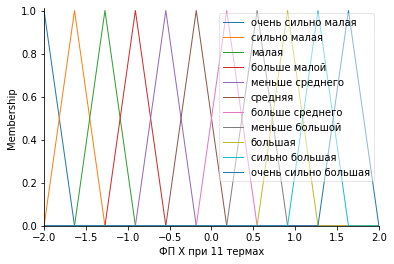

In [12]:
def rules(start, end, numberTerms, label):
  terms = []
  if numberTerms == 5:
    terms = termsLength5
  elif numberTerms == 7:
    terms = termsLength7
  elif numberTerms == 9:
    terms = termsLength9
  elif numberTerms == 11:
    terms = termsLength11

  step = (abs(start) + abs(end)) / numberTerms
  func = ctrl.Antecedent(np.arange(start, end + step, step), label)
  ranges = [None] * numberTerms
  for i in np.arange(0, numberTerms, 1):
    triangle = []
    if i == 0:
      triangle = [start, start, start + step]
      ranges[i] = {}
      ranges[i]['start'] = triangle[1]
      ranges[i]['end'] = triangle[2] - (step / 2)
    else:
      triangle = [
                  (i - 1) * step - abs(start),
                  i * step - abs(start),
                  (i + 1) * step - abs(start)
      ]
      if numberTerms - 1 == i:
        ranges[i] = {}
        ranges[i]['start'] = triangle[0] + (step / 2)
        ranges[i]['end'] = triangle[1]
      else:
        ranges[i] = {}
        ranges[i]['start'] = triangle[0] + (step / 2)
        ranges[i]['end'] = triangle[2] - (step / 2)
    ranges[i]['term'] = terms[i]
    func[terms[i]] = fuzz.trimf(func.universe, triangle)
  func.view()
  return ranges 


rangesX5 = rules(-2, 2, 5, 'ФП Х при 5 термах')
rangesX7 = rules(-2, 2, 7, 'ФП Х при 7 термах')
rangesX9 = rules(-2, 2, 9, 'ФП Х при 9 термах')
rangesX11 = rules(-2, 2, 11, 'ФП Х при 11 термах')

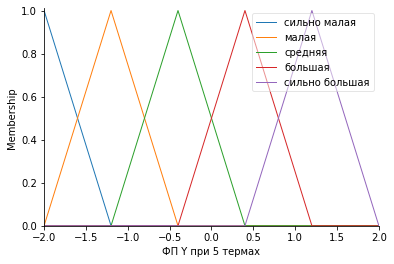

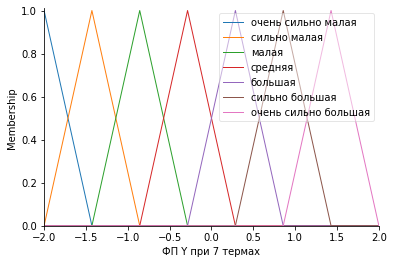

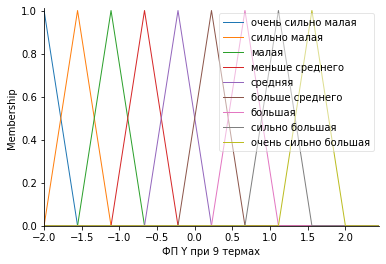

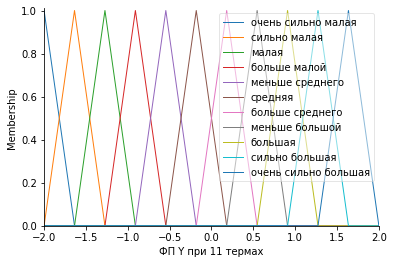

In [13]:
rangesY5 = rules(-2, 2, 5, 'ФП Y при 5 термах')
rangesY7 = rules(-2, 2, 7, 'ФП Y при 7 термах')
rangesY9 = rules(-2, 2, 9, 'ФП Y при 9 термах')
rangesY11 = rules(-2, 2, 11, 'ФП Y при 11 термах')

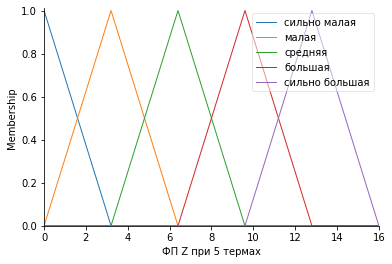

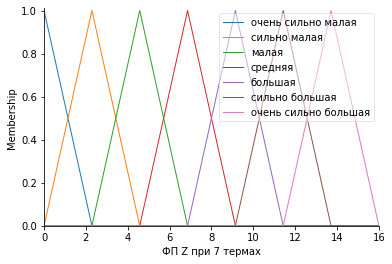

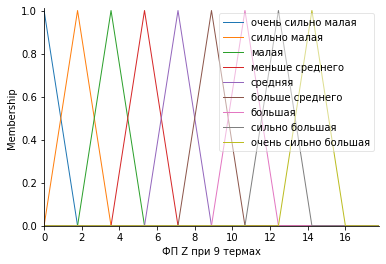

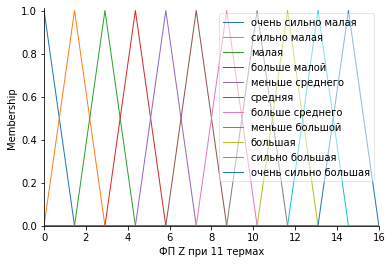

In [14]:
rangesZ5 = rules(0, 16, 5, 'ФП Z при 5 термах')
rangesZ7 = rules(0, 16, 7, 'ФП Z при 7 термах')
rangesZ9 = rules(0, 16, 9, 'ФП Z при 9 термах')
rangesZ11 = rules(0, 16, 11, 'ФП Z при 11 термах')

In [28]:
print("\033[1m" + "Мамдани для 5 термов" + "\033[0m")
for rangeX in rangesX5:
  for rangeY in rangesY5:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y**2 * x**2
    for rangeZ in rangesZ5:
      if rangeZ['start'] < z and z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], rangeZ['term']))

Мамдани для 5 термов
Если х = сильно малая и y = сильно малая то F= большая
Если х = сильно малая и y = малая то F= малая
Если х = сильно малая и y = средняя то F= сильно малая
Если х = сильно малая и y = большая то F= сильно малая
Если х = сильно малая и y = сильно большая то F= малая
Если х = малая и y = сильно малая то F= малая
Если х = малая и y = малая то F= малая
Если х = малая и y = средняя то F= сильно малая
Если х = малая и y = большая то F= сильно малая
Если х = малая и y = сильно большая то F= сильно малая
Если х = средняя и y = сильно малая то F= сильно малая
Если х = средняя и y = малая то F= сильно малая
Если х = средняя и y = средняя то F= сильно малая
Если х = средняя и y = большая то F= сильно малая
Если х = средняя и y = сильно большая то F= сильно малая
Если х = большая и y = сильно малая то F= сильно малая
Если х = большая и y = малая то F= сильно малая
Если х = большая и y = средняя то F= сильно малая
Если х = большая и y = большая то F= сильно малая
Если х = больш

In [29]:
print("\033[1m" + "Мамдани для 7 термов" + "\033[0m")
for rangeX in rangesX7:
  for rangeY in rangesY7:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y**2 * x**2
    for rangeZ in rangesZ7:
      if rangeZ['start'] < z and z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], rangeZ['term']))

Мамдани для 7 термов
Если х = очень сильно малая и y = очень сильно малая то F= сильно большая
Если х = очень сильно малая и y = сильно малая то F= средняя
Если х = очень сильно малая и y = малая то F= сильно малая
Если х = очень сильно малая и y = средняя то F= очень сильно малая
Если х = очень сильно малая и y = большая то F= очень сильно малая
Если х = очень сильно малая и y = сильно большая то F= сильно малая
Если х = очень сильно малая и y = очень сильно большая то F= малая
Если х = сильно малая и y = очень сильно малая то F= средняя
Если х = сильно малая и y = сильно малая то F= малая
Если х = сильно малая и y = малая то F= сильно малая
Если х = сильно малая и y = средняя то F= очень сильно малая
Если х = сильно малая и y = большая то F= очень сильно малая
Если х = сильно малая и y = сильно большая то F= сильно малая
Если х = сильно малая и y = очень сильно большая то F= сильно малая
Если х = малая и y = очень сильно малая то F= сильно малая
Если х = малая и y = сильно малая то F

In [30]:
print("\033[1m" + "Мамдани для 9 термов" + "\033[0m")
for rangeX in rangesX9:
  for rangeY in rangesY9:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y**2 * x**2
    for rangeZ in rangesZ9:
      if rangeZ['start'] < z and z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], rangeZ['term']))

Мамдани для 9 термов
Если х = очень сильно малая и y = очень сильно малая то F= сильно большая
Если х = очень сильно малая и y = сильно малая то F= больше среднего
Если х = очень сильно малая и y = малая то F= малая
Если х = очень сильно малая и y = меньше среднего то F= сильно малая
Если х = очень сильно малая и y = средняя то F= очень сильно малая
Если х = очень сильно малая и y = больше среднего то F= очень сильно малая
Если х = очень сильно малая и y = большая то F= сильно малая
Если х = очень сильно малая и y = сильно большая то F= малая
Если х = очень сильно малая и y = очень сильно большая то F= средняя
Если х = сильно малая и y = очень сильно малая то F= больше среднего
Если х = сильно малая и y = сильно малая то F= меньше среднего
Если х = сильно малая и y = малая то F= малая
Если х = сильно малая и y = меньше среднего то F= сильно малая
Если х = сильно малая и y = средняя то F= очень сильно малая
Если х = сильно малая и y = больше среднего то F= очень сильно малая
Если х = си

In [31]:
print("\033[1m" + "Мамдани для 11 термов" + "\033[0m")
for rangeX in rangesX11:
  for rangeY in rangesY11:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y**2 * x**2
    for rangeZ in rangesZ11:
      if rangeZ['start'] < z and z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], rangeZ['term']))

Мамдани для 11 термов
Если х = очень сильно малая и y = очень сильно малая то F= сильно большая
Если х = очень сильно малая и y = сильно малая то F= меньше большой
Если х = очень сильно малая и y = малая то F= меньше среднего
Если х = очень сильно малая и y = больше малой то F= малая
Если х = очень сильно малая и y = меньше среднего то F= сильно малая
Если х = очень сильно малая и y = средняя то F= очень сильно малая
Если х = очень сильно малая и y = больше среднего то F= очень сильно малая
Если х = очень сильно малая и y = меньше большой то F= сильно малая
Если х = очень сильно малая и y = большая то F= малая
Если х = очень сильно малая и y = сильно большая то F= меньше среднего
Если х = очень сильно малая и y = очень сильно большая то F= больше среднего
Если х = сильно малая и y = очень сильно малая то F= меньше большой
Если х = сильно малая и y = сильно малая то F= средняя
Если х = сильно малая и y = малая то F= больше малой
Если х = сильно малая и y = больше малой то F= малая
Если 

In [33]:
def singleton(term, numberTerms):
  if numberTerms == 5:
    return termsLength5.index(term) - ((numberTerms - 1) / 2)
  elif numberTerms == 7:
    return termsLength7.index(term) - ((numberTerms - 1) / 2)
  elif numberTerms == 9:
    return termsLength9.index(term) - ((numberTerms - 1) / 2)
  elif numberTerms == 11:
    return termsLength11.index(term) - ((numberTerms - 1) / 2)

print("\033[1m" + "Синглтон для 5 термов" + "\033[0m")
for rangeX in rangesX5:
  for rangeY in rangesY5:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y**2 * x**2
    for rangeZ in rangesZ5:
      if rangeZ['start'] < z and z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], singleton(rangeZ['term'], 5)))

Синглтон для 5 термов
Если х = сильно малая и y = сильно малая то F= 1.0
Если х = сильно малая и y = малая то F= -1.0
Если х = сильно малая и y = средняя то F= -2.0
Если х = сильно малая и y = большая то F= -2.0
Если х = сильно малая и y = сильно большая то F= -1.0
Если х = малая и y = сильно малая то F= -1.0
Если х = малая и y = малая то F= -1.0
Если х = малая и y = средняя то F= -2.0
Если х = малая и y = большая то F= -2.0
Если х = малая и y = сильно большая то F= -2.0
Если х = средняя и y = сильно малая то F= -2.0
Если х = средняя и y = малая то F= -2.0
Если х = средняя и y = средняя то F= -2.0
Если х = средняя и y = большая то F= -2.0
Если х = средняя и y = сильно большая то F= -2.0
Если х = большая и y = сильно малая то F= -2.0
Если х = большая и y = малая то F= -2.0
Если х = большая и y = средняя то F= -2.0
Если х = большая и y = большая то F= -2.0
Если х = большая и y = сильно большая то F= -2.0
Если х = сильно большая и y = сильно малая то F= -1.0
Если х = сильно большая и y = 

In [34]:
print("\033[1m" + "Синглтон для 7 термов" + "\033[0m")
for rangeX in rangesX7:
  for rangeY in rangesY7:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y**2 * x**2
    for rangeZ in rangesZ7:
      if rangeZ['start'] < z and z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], singleton(rangeZ['term'], 7)))

Синглтон для 7 термов
Если х = очень сильно малая и y = очень сильно малая то F= 2.0
Если х = очень сильно малая и y = сильно малая то F= 0.0
Если х = очень сильно малая и y = малая то F= -2.0
Если х = очень сильно малая и y = средняя то F= -3.0
Если х = очень сильно малая и y = большая то F= -3.0
Если х = очень сильно малая и y = сильно большая то F= -2.0
Если х = очень сильно малая и y = очень сильно большая то F= -1.0
Если х = сильно малая и y = очень сильно малая то F= 0.0
Если х = сильно малая и y = сильно малая то F= -1.0
Если х = сильно малая и y = малая то F= -2.0
Если х = сильно малая и y = средняя то F= -3.0
Если х = сильно малая и y = большая то F= -3.0
Если х = сильно малая и y = сильно большая то F= -2.0
Если х = сильно малая и y = очень сильно большая то F= -2.0
Если х = малая и y = очень сильно малая то F= -2.0
Если х = малая и y = сильно малая то F= -2.0
Если х = малая и y = малая то F= -3.0
Если х = малая и y = средняя то F= -3.0
Если х = малая и y = большая то F= -3.0

In [35]:
print("\033[1m" + "Синглтон для 9 термов" + "\033[0m")
for rangeX in rangesX9:
  for rangeY in rangesY9:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y**2 * x**2
    for rangeZ in rangesZ9:
      if rangeZ['start'] < z and z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], singleton(rangeZ['term'], 9)))

Синглтон для 9 термов
Если х = очень сильно малая и y = очень сильно малая то F= 3.0
Если х = очень сильно малая и y = сильно малая то F= 1.0
Если х = очень сильно малая и y = малая то F= -2.0
Если х = очень сильно малая и y = меньше среднего то F= -3.0
Если х = очень сильно малая и y = средняя то F= -4.0
Если х = очень сильно малая и y = больше среднего то F= -4.0
Если х = очень сильно малая и y = большая то F= -3.0
Если х = очень сильно малая и y = сильно большая то F= -2.0
Если х = очень сильно малая и y = очень сильно большая то F= 0.0
Если х = сильно малая и y = очень сильно малая то F= 1.0
Если х = сильно малая и y = сильно малая то F= -1.0
Если х = сильно малая и y = малая то F= -2.0
Если х = сильно малая и y = меньше среднего то F= -3.0
Если х = сильно малая и y = средняя то F= -4.0
Если х = сильно малая и y = больше среднего то F= -4.0
Если х = сильно малая и y = большая то F= -3.0
Если х = сильно малая и y = сильно большая то F= -2.0
Если х = сильно малая и y = очень сильно б

In [36]:
print("\033[1m" + "Синглтон для 11 термов" + "\033[0m")
for rangeX in rangesX11:
  for rangeY in rangesY11:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y**2 * x**2
    for rangeZ in rangesZ11:
      if rangeZ['start'] < z and z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], singleton(rangeZ['term'], 11)))

Синглтон для 11 термов
Если х = очень сильно малая и y = очень сильно малая то F= 4.0
Если х = очень сильно малая и y = сильно малая то F= 2.0
Если х = очень сильно малая и y = малая то F= -1.0
Если х = очень сильно малая и y = больше малой то F= -3.0
Если х = очень сильно малая и y = меньше среднего то F= -4.0
Если х = очень сильно малая и y = средняя то F= -5.0
Если х = очень сильно малая и y = больше среднего то F= -5.0
Если х = очень сильно малая и y = меньше большой то F= -4.0
Если х = очень сильно малая и y = большая то F= -3.0
Если х = очень сильно малая и y = сильно большая то F= -1.0
Если х = очень сильно малая и y = очень сильно большая то F= 1.0
Если х = сильно малая и y = очень сильно малая то F= 2.0
Если х = сильно малая и y = сильно малая то F= 0.0
Если х = сильно малая и y = малая то F= -2.0
Если х = сильно малая и y = больше малой то F= -3.0
Если х = сильно малая и y = меньше среднего то F= -4.0
Если х = сильно малая и y = средняя то F= -5.0
Если х = сильно малая и y = 